In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)


In [20]:
df = pd.read_excel(r"E:/anakdata.id/Week 2/data latih week2.xlsx")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               14 non-null     datetime64[ns]
 1   AMERICANO          14 non-null     int64         
 2   BOLU               14 non-null     int64         
 3   COOKIES BANANA     14 non-null     int64         
 4   COOKIES COCO       14 non-null     int64         
 5   KOPI SUSU          14 non-null     int64         
 6   KUE LAPIS          13 non-null     float64       
 7   LEMON TEA          14 non-null     int64         
 8   MILK TEA BOBA      14 non-null     int64         
 9   ROTI BUN           14 non-null     int64         
 10  THAI TEA           14 non-null     int64         
 11  Total Customer     14 non-null     int64         
 12  Total Transaction  14 non-null     int64         
 13  Total Profit       14 non-null     int64         
dtypes: datetime6

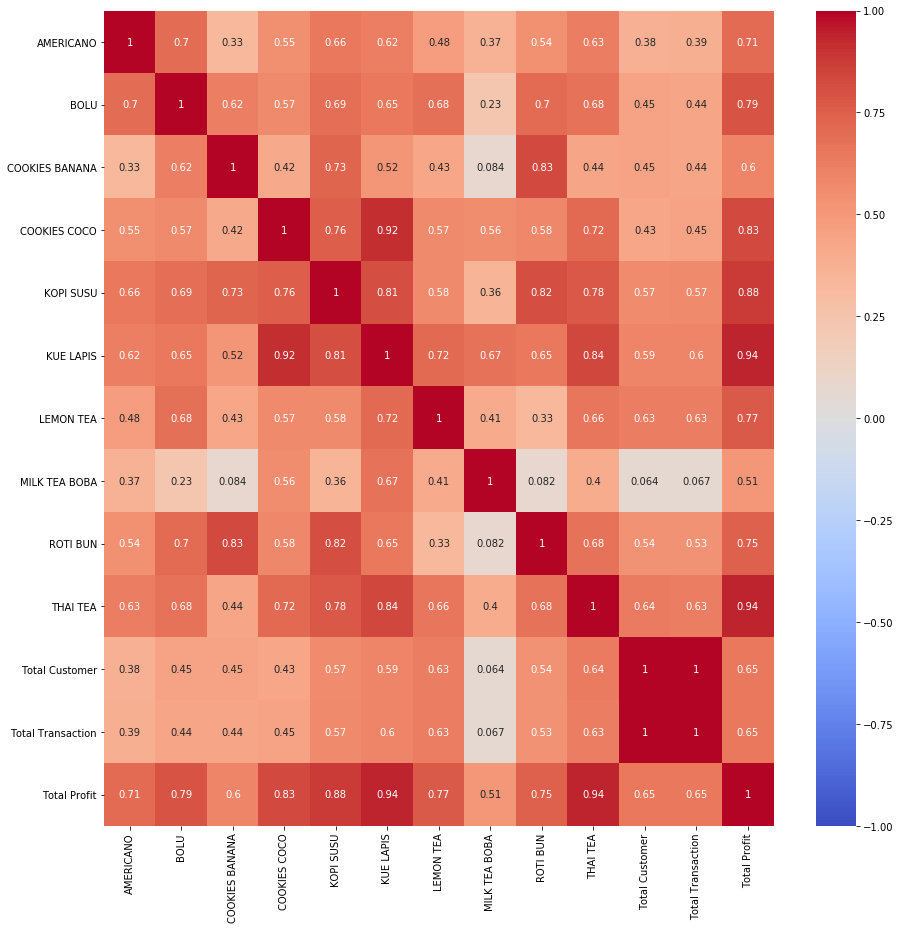

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), vmin=-1,cmap='coolwarm',annot=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               14 non-null     datetime64[ns]
 1   AMERICANO          14 non-null     int64         
 2   BOLU               14 non-null     int64         
 3   COOKIES BANANA     14 non-null     int64         
 4   COOKIES COCO       14 non-null     int64         
 5   KOPI SUSU          14 non-null     int64         
 6   KUE LAPIS          13 non-null     float64       
 7   LEMON TEA          14 non-null     int64         
 8   MILK TEA BOBA      14 non-null     int64         
 9   ROTI BUN           14 non-null     int64         
 10  THAI TEA           14 non-null     int64         
 11  Total Customer     14 non-null     int64         
 12  Total Transaction  14 non-null     int64         
 13  Total Profit       14 non-null     int64         
dtypes: datetime6

In [37]:
df.isnull().sum()

Date                 0
AMERICANO            0
BOLU                 0
COOKIES BANANA       0
COOKIES COCO         0
KOPI SUSU            0
KUE LAPIS            1
LEMON TEA            0
MILK TEA BOBA        0
ROTI BUN             0
THAI TEA             0
Total Customer       0
Total Transaction    0
Total Profit         0
dtype: int64

In [40]:
df.fillna(0,inplace=True)

In [41]:
df.isnull().sum()

Date                 0
AMERICANO            0
BOLU                 0
COOKIES BANANA       0
COOKIES COCO         0
KOPI SUSU            0
KUE LAPIS            0
LEMON TEA            0
MILK TEA BOBA        0
ROTI BUN             0
THAI TEA             0
Total Customer       0
Total Transaction    0
Total Profit         0
dtype: int64

In [53]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['AMERICANO', 'BOLU', 'COOKIES BANANA', 'COOKIES COCO','KOPI SUSU','KUE LAPIS','LEMON TEA',
                'MILK TEA BOBA', 'ROTI BUN','THAI TEA','Total Customer','Total Transaction' ]
X = df[feature_cols]
y = df["Total Profit"]

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.9103830456733704e-10
[ 7.00000000e+02  7.00000000e+02  7.00000000e+02  1.00000000e+03
  1.60000000e+03  8.00000000e+02  1.70000000e+03  1.70000000e+03
  9.00000000e+02  1.60000000e+03 -7.38964445e-13  2.84217094e-13]


In [43]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

[('AMERICANO', 700.0000000000058),
 ('BOLU', 699.9999999999982),
 ('COOKIES BANANA', 700.0000000000036),
 ('COOKIES COCO', 1000.0),
 ('KOPI SUSU', 1599.9999999999952),
 ('KUE LAPIS', 799.9999999999998),
 ('LEMON TEA', 1699.9999999999973),
 ('MILK TEA BOBA', 1699.999999999999),
 ('ROTI BUN', 899.9999999999955),
 ('THAI TEA', 1599.999999999996),
 ('Total Customer', -7.389644451905042e-13),
 ('Total Transaction', 2.8421709430404007e-13)]

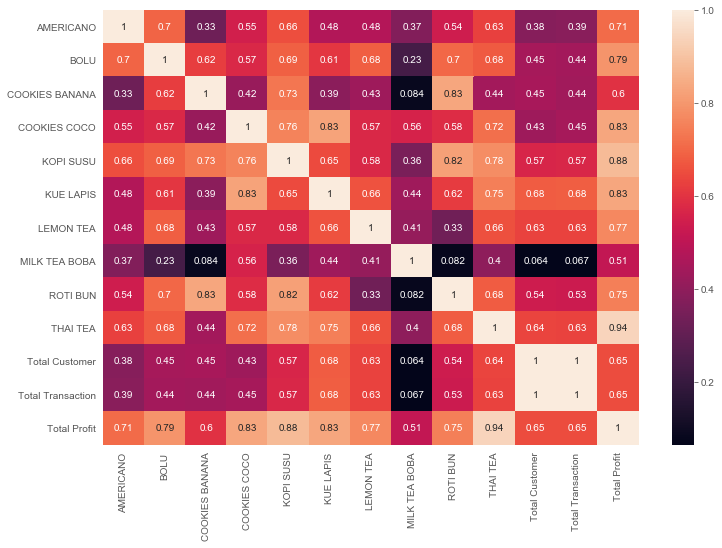

In [47]:
sns.heatmap(df.corr(), annot=True)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['AMERICANO', 'BOLU', 'COOKIES BANANA', 'COOKIES COCO','KOPI SUSU','KUE LAPIS','LEMON TEA',
                'MILK TEA BOBA', 'ROTI BUN','THAI TEA','Total Customer','Total Transaction' ]]
y = df["Total Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 2422.3088483389965
R^2:  0.9967831899468911


In [54]:
X = df[['AMERICANO', 'BOLU', 'COOKIES BANANA', 'COOKIES COCO','KOPI SUSU','KUE LAPIS','LEMON TEA',
                'MILK TEA BOBA', 'ROTI BUN','THAI TEA','Total Customer','Total Transaction' ]]
y = df["Total Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 2422.3088483389965
R^2:  0.9967831899468911


In [58]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

ImportError: cannot import name '_deprecate_positional_args'

In [59]:
df.describe()

,AMERICANO,BOLU,COOKIES BANANA,COOKIES COCO,KOPI SUSU,KUE LAPIS,LEMON TEA,MILK TEA BOBA,ROTI BUN,THAI TEA,Total Customer,Total Transaction,Total Profit
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,16.285714,17.142857,15.428571,12.357143,11.857143,16.928571,15.714286,17.142857,13.785714,49.428571,30.928571,31.285714,226421.428571
std,8.370540,9.686288,6.779089,8.044177,7.654633,10.795044,8.615090,6.514565,9.601110,26.511868,8.633248,8.844195,100365.855200
min,5.000000,6.000000,5.000000,2.000000,2.000000,0.000000,1.000000,4.000000,2.000000,15.000000,17.000000,17.000000,86500.000000
25%,9.000000,12.000000,10.500000,5.000000,4.250000,7.750000,12.000000,15.250000,7.750000,31.000000,23.750000,24.000000,172900.000000
50%,17.000000,15.000000,14.000000,12.000000,11.500000,16.500000,14.000000,16.500000,12.500000,48.500000,32.500000,33.000000,222250.000000
75%,20.500000,16.750000,18.750000,18.750000,18.250000,24.750000,21.250000,20.500000,19.250000,58.000000,37.750000,38.750000,262375.000000
max,31.000000,37.000000,28.000000,28.000000,24.000000,37.000000,30.000000,27.000000,37.000000,106.000000,43.000000,44.000000,434400.000000
